# Laplace Equation Solver Using Relaxation Method
This activity was derived from Schroeder's (https://physics.weber.edu/schroeder/javacourse/relaxation.pdf)

The goal of this project is to calculate the electrostatic potential (or “voltage”) throughout a region that contains electrodes of various shapes, held at various fixed potentials. For simplicity we will take the region to be two-dimensional. For comparison, you may recall an introductory physics lab in which you measured the voltage
throughout a two-dimensional region with various electrodes made of conducting paint. If you did not do this experiment, you can use https://phet.colorado.edu/sims/html/charges-and-fields/latest/charges-and-fields_en.html to simulate the work we do here. This project is the computational counterpart of that experiment.

## Theory
The electrostatic potential, $V (x, y)$, is defined to be the function whose negative
gradient is the electric field:

\begin{align}
    E &= −\nabla V\\
    E_x &= −\frac{\partial{V}}{\partial{x}}\\
    E_y &= −\frac{\partial{V}}{\partial{y}}.\label{eq1}\tag{1} \\
\end{align}

The electric field, in turn, obeys Gauss’s law,

\begin{align}\nabla \cdot E =  \frac{\partial{E}}{\partial{x}} + \frac{\partial{E}}{\partial{y}} = \frac{\rho}{\epsilon_o}.\label{eq2}\tag{2} \\
\end{align}

In the space between electrodes, the charge density $\rho$ is zero. Then, if we substitute
equation \ref{eq1} into equation \ref{eq2}, we obtain simply

\begin{align}\frac{\partial{^2V}}{\partial{x^2}} + \frac{\partial{^2V}}{\partial{y^2}} = \nabla^2V=0.\label{eq3}\tag{3} \\
\end{align}

This is called *Laplace’s equation*. It says that if the function $V (x, y)$ is concave-up along one direction, it has to compensate by being concave-down along the perpendicular direction. To solve Laplace’s equation numerically, we need to approximate second derivatives for non-infinitesimal $dx$ and $dy$. First recall that the accurate way to estimate a first derivative at point $x$ is to evaluate the function symmetrically, a little to either side of $x$:

\begin{align}\frac{\partial{V}}{\partial{x}} = \frac{V\left(x+\frac{\delta}{2}\right)-V\left(x-\frac{\delta}{2}\right)}{\delta}.\label{eq4}\tag{4} \\
\end{align}

where $\delta$ is an abbreviation for $dx$ (or $dy$, which will be the same as $dx$ on our 2D square grid). <font color='red'>On a hand-drawn graph, you should prove to yourself equation \ref{eq4} is correct. Explain your reasoning to your instructor.</font>

To evaluate the second derivative, you can just replace $V$ in this formula with $\frac{\partial{V}}{\partial{x}}$. Then use equation \ref{eq4} again to evaluate each of the two first derivatives in the numerator, noting (for instance) that a half step to either side of $x + \frac{\delta}{2}$ takes us to $x + \delta$ on one side, and back to $x$ on the other. When the smoke clears, you should find simply

\begin{align}
\frac{\partial{^2V}}{\partial{x^2}} = \frac{V\left(x+\delta\right)+V\left(x-\delta\right)-2V\left(x\right)}{\delta^2}.\label{eq5}\tag{5} \\
\end{align}
    
<font color='red'>Please derive this equation carefully in your report.</font> Of course, a similar formula holds for $\frac{\partial{^2V}}{\partial{y^2}}$. Plugging both results into Laplace’s equation and canceling the factors of $\delta$ in the denominator, <font color='red'>you can quickly show (in your report) that</font>

\begin{align}
V\left(x, y\right) = \frac{V\left(x+\delta, y\right)+V\left(x-\delta,y\right)+V\left(x, y+\delta\right)+V\left(x,y-\delta\right)}{4}.\label{eq6}\tag{6} \\
\end{align}

In other words, the potential at any lattice site is simply the average of the potentials at the four adjacent sites. <font color='red'>It is probably helpful to draw a 3x3 array (lattice) and shade the cells that are averaged and the center cell that gets the average value. What is $\delta$?</font> 

Our goal, then, is to find a function $V (x, y)$ that satisfies equation \ref{eq6} at every point on our grid, for some given boundary conditions (sites with fixed values of $V$) that may be geometrically complex.

A simple algorithm for doing this is to start with any set of $V$ values whatsoever (perhaps zero everywhere except on the fixed electrodes), then go through and set the $V$ value at each site equal to the average of its four neighbors. Of course, the neighbors will change as well, so this procedure doesn’t produce an actual solution, but it should still get us closer to the solution. We then repeat the procedure over and over, getting closer to the actual solution with each iteration. This very simple algorithm is called the *relaxation method*. (The relaxation method can easily be adapted to a variety of boundary-value problems, in one or many dimensions, even for differential equations that are more complicated than Laplace’s equation.)

First, import some important Python libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Program Design
Use a 2D square space. This space corresponds to an $x, y$ coordinate space. <font color='red'>Create a 2D array where each array point is a small region $\delta \times \delta$ in area. Start with an array of 20 × 20, but plan to increase the resolution after you have tested everything, i.e., do not hard code the array size because you will need to use the size repeatedly in your code.</font> Use numpy to create the array.

```np.zeros((dim,dim))```

We will be assigning boundary conditions (potentials at known points).To keep track of arbitrary boundary conditions you can simply use a second equally-sized two-dimensional array of booleans, set to true at each site where the potential is to be held fixed, i.e., each site that is part of an “electrode”.

```boundaries = np.zeros((dim, dim), dtype=bool)```

In [ ]:
#set the array dimension
dim =

#Make your 2D arrays
potential =
boundaries = 

### Initializing the Arrays

You will need to decide what range of potential values to work with. This is pretty arbitrary, so do whatever seems to make sense: 0 to 1, or 0 to 100, or −10 to 10, etc. Think about capacitor experiments and what voltages you might used to charge a capacitor. <font color='red'>Be sure to document your choice, both in your report.</font>

We will used array indices to set the electrodes and other boundaries. For example to set a row or column to a particular value, I might use the command

```potential[10,:] = 100```

<font color='red'>You should determine the commands to set your electrode potentials such that the top row is one potential value; the bottom row is another potential value; and everywhere else is zero. Your boolean boundaries should be set to True at the electrodes and the left-most and right-most columns. Boundaries should False everywhere else. Prove to yourself that you have correctly set all of these values.</font>

3. Calculate V everywhere once.
4. Write a loop to calculate until the matrix converges. What is convergence?

In [ ]:
#Set the upper and lower electrode potentials
potential[,] = #upper
potential[,] = #lower
boundaries[,] = #upper
boundaries[,] = #lower
boundaries[,] = #left
boundaries[,] = #right

#Prove that you have done what you think you have done, e.g., print something


### Single Iteration Potential Calculation
We want to make sure we know how to calculate the potential using the derived equation 6. To calculate the potential everywhere, we will use `for` loops to go point-by-point through the potential array. As an example, we can loop over the rows and set every row at column zero to the value 1

```
for x in range(dim):
    potential[x, 0] = 1
```

Use nested loops to loop over all rows (x) and columns (y) and calculate the potential using equation 6. You will need to use a conditional statement so that you do not calculate the potential at the boundaries.

```
if boundaries[x,y] == False
```

At first, you may want to calculate equation 6 in a new array (`new_potential`) so you don't overwrite `potential` until you know your code works.

<font color='red'>Verify your code is doing what you expect.</font>

In [ ]:
for :
    for :
        if :
            V[x,y] = 
            
#verify

### Calculate the Potential

You should notice that only the first row or two have potential values. This is because in most of the array, you average zero. Now that we can calculate the potential on a 2D array, we need to iteratively calculate until all of the values in the 2D array converge. This is the relaxation part of the method. To do this, your nested `for` loop code above will need to be put into a `for` loop that repeats the calculation until convergence is achieved. We will check for convergence to determine the number of loops needed.

Convergence can be determined in many different ways. Let's use the idea that the new potential array should approach a constant set of values once it is fully relaxed. Therefore, if we can somehow compact the array to a single value that tells us something about its values, we can watch how that single value changes each time we calculate $V$. <font color='red'>How might we compact the potential array to a single value?</font>

Once you determine a method for reducing to a single value, wrap your for loops into another for loop that will repeat the potential calculation using the previous potential array and allow you observe convergence of the single value you use.

<font color='red'>**HINT: You may want to plot the single value vs. the number of loops performed.** Plot the potential after it has converged.</font> Examples of plotting 1D arrays and 2D arrays are shown below.

1D:
```
plt.plot(num_loops, single_value)
plt.show()
```

2D:
```
plt.imshow(new_potential)
plt.colorbar()
plt.show()
```

In [ ]:
#Copy the potential array into a duplicate
new_potential = potential
#Create a single-valued measure of convergence from 2D array
#For example the average squared, exluding the electrodes
new_avesquared = 
old_avesquared = 
#convergence_check (difference between old and new)
convergence_value = 

#Calculate a fully converged potential
N = 100 #How many times to repeat calculation for convergence
for iter in range(N):
    for :#loop over x
        for :#loop over y
            if :#calculate new potential
    #calculate single value measure of new potential
    
    #calculate convergence check
    
    #add convergence check value to an array
    
    
#Plot the solution(2 graphs)
#Plot the convergence value vs. iteration number
#Plot the potential

# Solutions

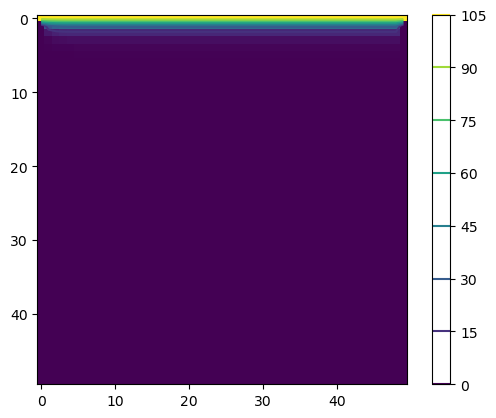

In [3]:
dim = 50
potential = np.zeros((dim,dim), dtype=float)
boundaries = np.zeros((dim, dim), dtype=bool)
potential[0,:] = 100
#potential[dim-1,:]= -10 
boundaries[:,0] = True
boundaries[:,dim-1] = True
boundaries[0,:] = True
boundaries[dim-1,:] = True
#print(boundaries)
new_potential=potential #create a new potential array because we use the old one to update the new one
for x in range(dim):
    for y in range(dim):
        if boundaries[x,y] == False:
            new_potential[x,y] = (new_potential[x,y+1]+new_potential[x,y-1]+new_potential[x+1,y]+new_potential[x-1,y])/4
            
#plt.imshow(boundaries)
plt.imshow(new_potential)
plt.contour(new_potential)
plt.colorbar()
plt.show()

Initial convergence check =  0.0
Final convergence check = 19.078303833946336
number of iterations = 1500


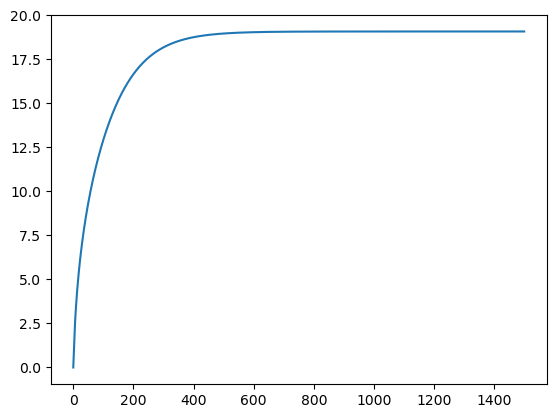

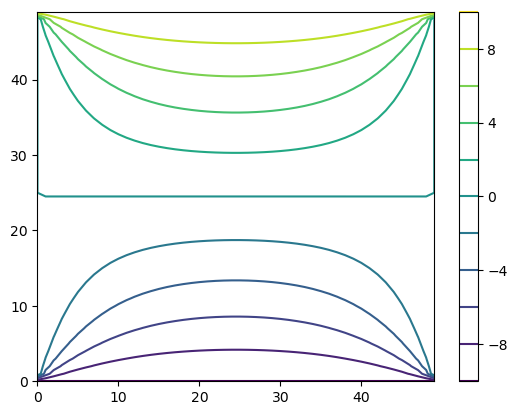

In [9]:
dim = 50
Vmin = -10
Vmax = 10
contours = np.linspace(Vmin, Vmax, 11)
potential = np.zeros((dim,dim), dtype=float)
potential[0,:] = Vmin
potential[dim-1,:]= Vmax
new_potential=potential
zeez = np.zeros((dim,dim))
check = np.average(np.where(boundaries==False, new_potential, zeez)**2)
N = 1500
a = np.zeros(N)
niter = np.zeros(N)
print("Initial convergence check = ", check)
#while oldcheck > check:
for iters in range(N):
    a[iters] = check # store the average potential at each step
    niter[iters] = iters #x array for plotting average potentialk
    potential = new_potential #redefine potential from previous step
    for x in range(dim):
        for y in range(dim):
            if boundaries[x,y] == False:
                new_potential[x,y] = (potential[x,y+1]+potential[x,y-1]+potential[x+1,y]+potential[x-1,y])/4
    #My check is the average of the absolute value of the difference array
    check = np.average(np.where(boundaries==False, new_potential, zeez)**2)
    np.append(a, [check])
    np.append(niter, [iters])
#    print(iters, check)
#print(niter, a)
print("Final convergence check =", check)
print("number of iterations =", iters+1)
plt.plot(niter,a) #This plot should plateau at convergence
plt.show()

#plt.imshow(new_potential)
plt.contour(new_potential, levels=contours)
plt.colorbar()
plt.show()

### Automated Minimization of the Relaxation
The main weaknesses of your simulation at this point are that it takes a lot of relaxation steps to converge to the final solution, and (worse) it’s hard to tell when it has actually converged. Let’s address the second problem first. Add some code to your relaxation algorithm to keep track, during each iteration step, of the maximum amount by which any site changes. Display this amount at the end of each step. Also display the number of iterations that you’ve done so far (since the last reset). Run the simulation for a simple electrode configuration. Observe the results, and make some notes in your report. For example, how many iterations does it take before the maximum change is less than some reasonably small amount? How do you determine what the small amount should be? 

**BONUS:** To speed up the convergence, you can try to anticipate future iterations by “overcorrecting” with each lattice site update. That is, calculate the difference between the average of the four neighbors (using the Gauss-Seidel choice of the new values for two of the neighbors) and the old value of the current site. Call this difference $\Delta$. Then, instead of adding $\Delta$ to the old value in order to obtain the new, add $\Delta$ times a constant (call it $\omega$) that’s somewhat greater than 1. It’s hard to determine the best value of this constant in advance, so you will have to adjust it between 1 and 2 manually. This idea is called successive over-relaxation, often abbreviated SOR. Again using some reasonably simple electrode configuration, first set $\omega$ = 1 and check that you get the same behavior as before (with the Gauss-Seidel method). Then increase the value of $\omega$ and see what happens. What is the optimum value of $\omega$ for your electrode configuration? (Your lab report should include a table of data that documents your answer to this question. Be sure it is clear to the instructor the electrode configuration that you used for your tests.)

Initial convergence check =  100
Final convergence check = 0.0009971362499037184
number of iterations = 1005


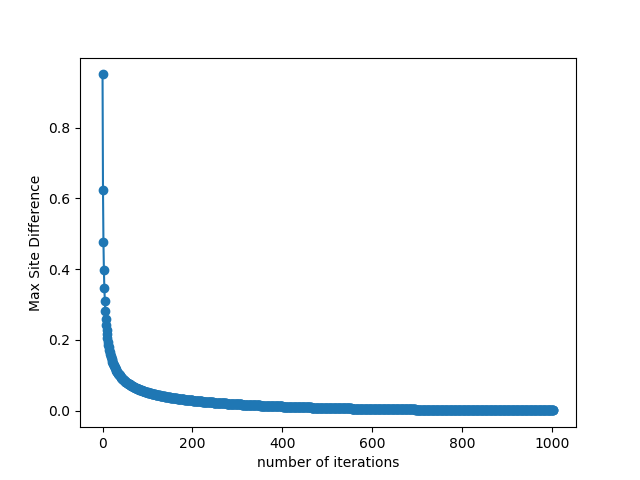

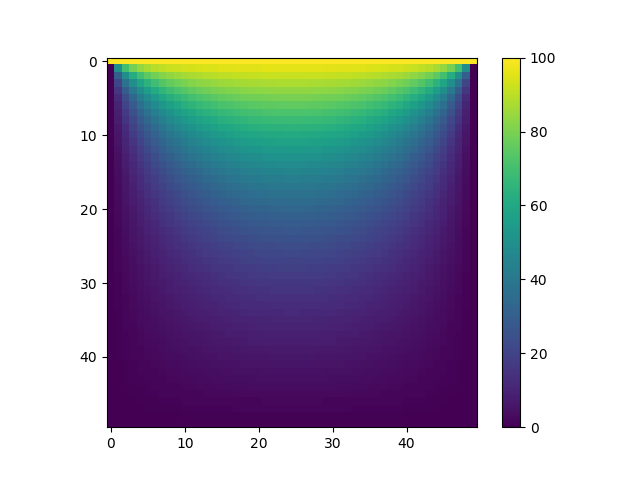

In [89]:
dim = 50
potential = np.zeros((dim,dim), dtype=float)
potential[0,:] = 100.0
potential[dim-1,:]= 0.0
new_potential=potential
zeez = np.zeros((dim,dim))
#check = np.amax(np.where(boundaries==False, potential, zeez))
#init = np.amax(np.where(boundaries==False, potential, zeez))
check = 100
N = 100
a = []#np.empty( shape=(0))
niter = []# np.empty( shape=(0))
iters = 0
print("Initial convergence check = ", check)
while check > 1e-3:
#for iters in range(N):
    potential = new_potential #redefine potential from previous step
    init = np.average(np.where(boundaries==False, potential, zeez)) #get the previous average
    for x in range(dim):
        for y in range(dim):
            if boundaries[x,y] == False:
                new_potential[x,y] = (potential[x,y+1]+potential[x,y-1]+potential[x+1,y]+potential[x-1,y])/4
    #My check is the average of the absolute value of the difference array
    #get the current average and subtract previous then take absolute value
    check = np.abs(init - np.average(np.where(boundaries==False, new_potential, zeez)))
#    print("{:.2e}".format(check))
    a.append(check)
    niter.append(iters)
    iters += 1

print("Final convergence check =", check)
print("number of iterations =", iters+1)
plt.plot(niter,a, '-o') #This plot should decay to zero
plt.xlabel("number of iterations")
plt.ylabel("Max Site Difference")
plt.show()

plt.imshow(new_potential)
plt.colorbar()
plt.show()